In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
mean_values = df.select_dtypes(include="number").mean()

df1 = df.fillna(mean_values)

In [9]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
numeric_cols = df1.select_dtypes(include='number').columns

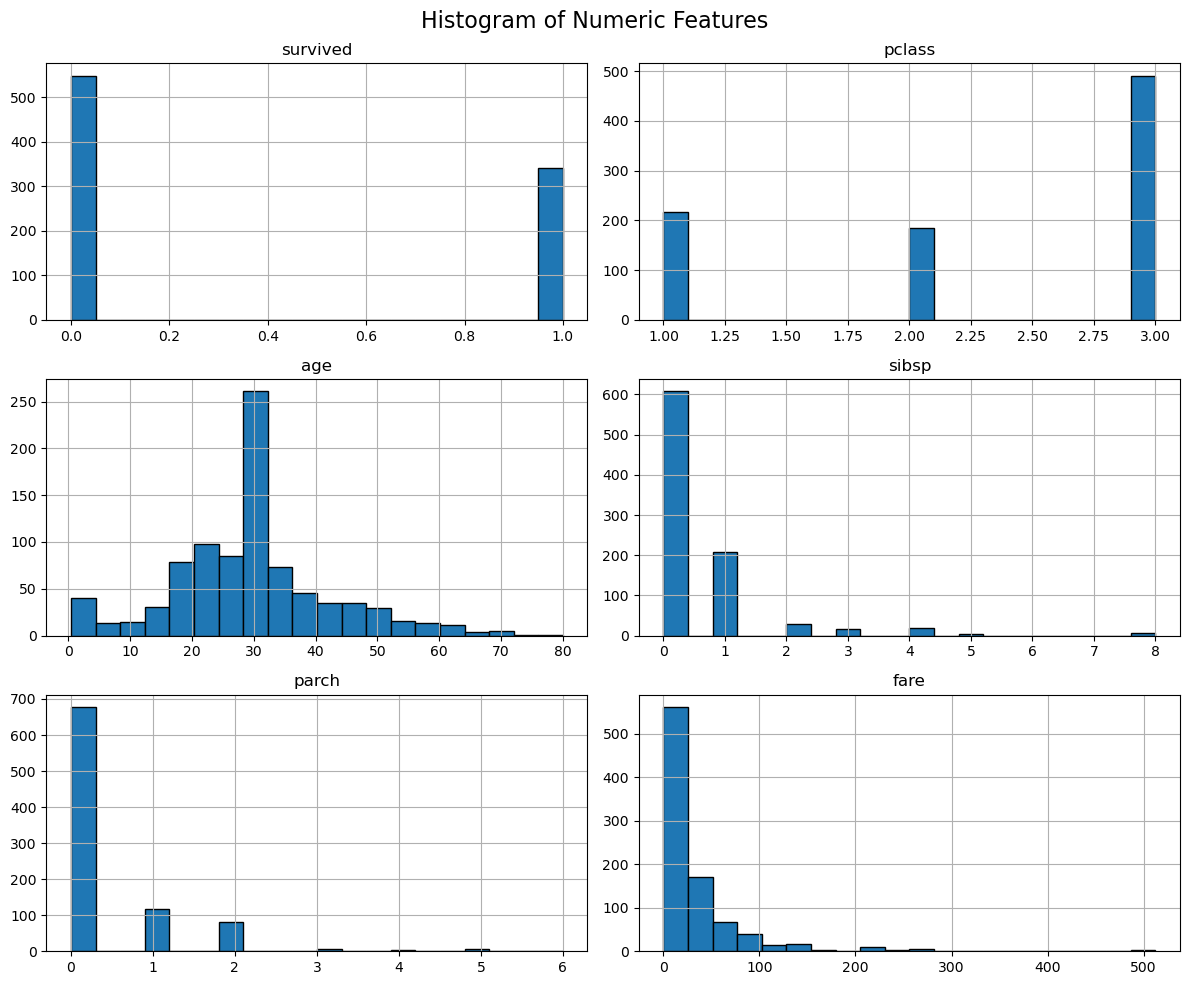

In [12]:
df1[numeric_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


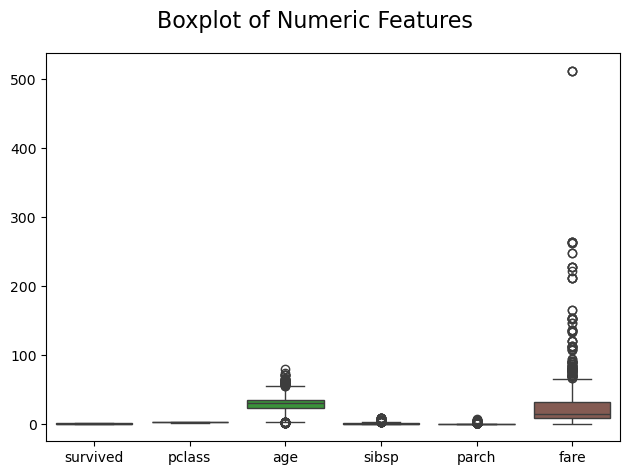

In [16]:
sns.boxplot(df1[numeric_cols])
plt.suptitle("Boxplot of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [23]:
Q1 = df1[numeric_cols].quantile(0.25)
Q3 =  df1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("First quantitie", Q1)
print("Thrid quantitie", Q3)

First quantitie survived     0.0000
pclass       2.0000
age         22.0000
sibsp        0.0000
parch        0.0000
fare         7.9104
Name: 0.25, dtype: float64
Thrid quantitie survived     1.0
pclass       3.0
age         35.0
sibsp        1.0
parch        0.0
fare        31.0
Name: 0.75, dtype: float64


In [25]:
print("min value of the data", lower)
print("Max value of the data", upper)

min value of the data survived    -1.500
pclass       0.500
age          2.500
sibsp       -1.500
parch        0.000
fare       -26.724
dtype: float64
Max value of the data survived     2.5000
pclass       4.5000
age         54.5000
sibsp        2.5000
parch        0.0000
fare        65.6344
dtype: float64


C:\Users\j s\AppData\Local\Temp\ipykernel_10032\439316554.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1, x='age', shade=True, fill= True)


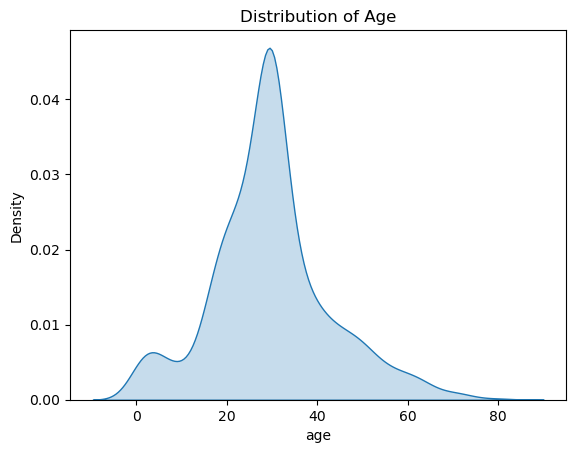

In [28]:
sns.kdeplot(data=df1, x='age', shade=True, fill= True)
plt.title('Distribution of Age')
plt.show()

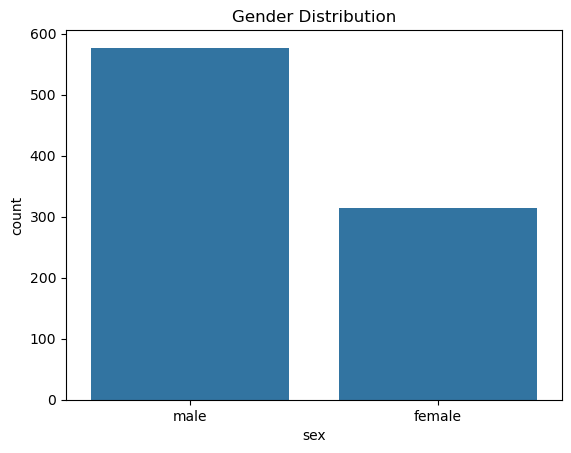

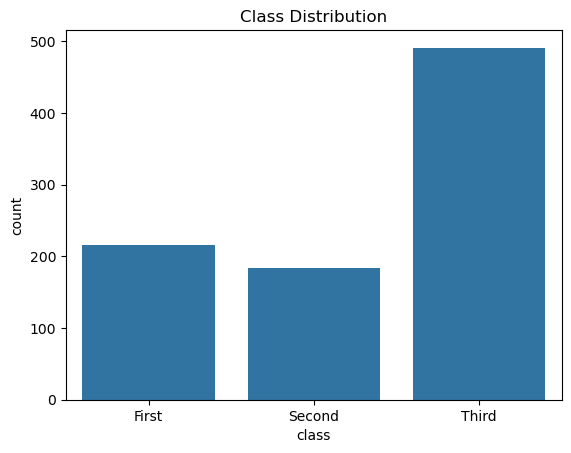

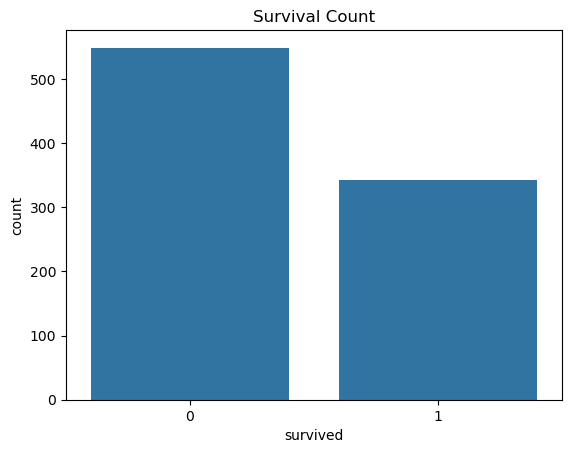

In [31]:
# Countplot for 'sex'
sns.countplot(data=df, x='sex')
plt.title("Gender Distribution")
plt.show()

# Countplot for 'class'
sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()

# Survival count
sns.countplot(data=df, x='survived')
plt.title("Survival Count")
plt.show()


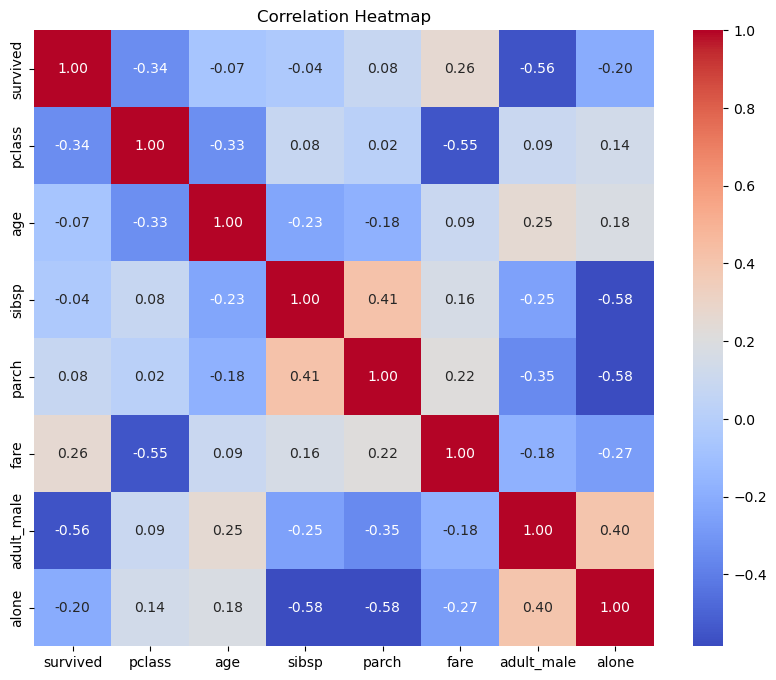

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

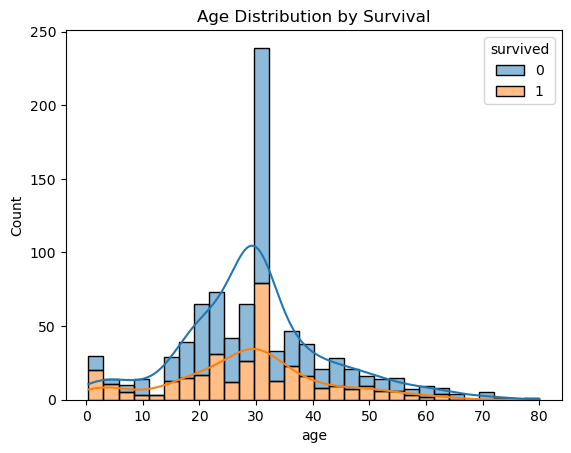

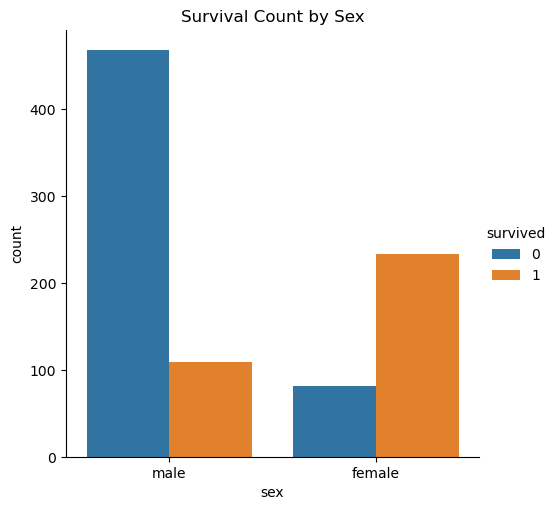

In [33]:
sns.histplot(data=df1, x='age', hue='survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

sns.catplot(data=df1, x='sex', hue='survived', kind='count')
plt.title("Survival Count by Sex")
plt.show()

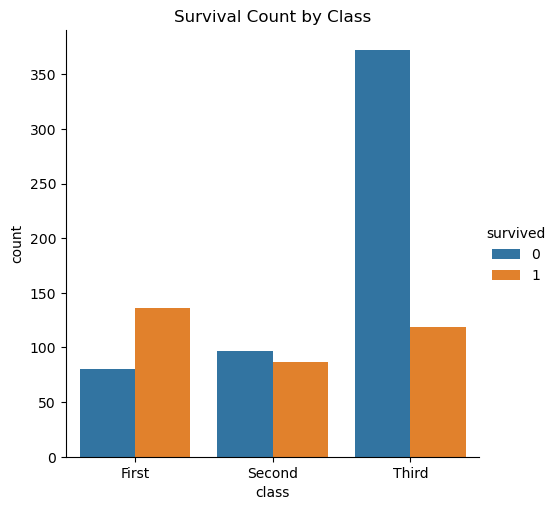

In [34]:
sns.catplot(data=df, x='class', hue='survived', kind='count')
plt.title("Survival Count by Class")
plt.show()

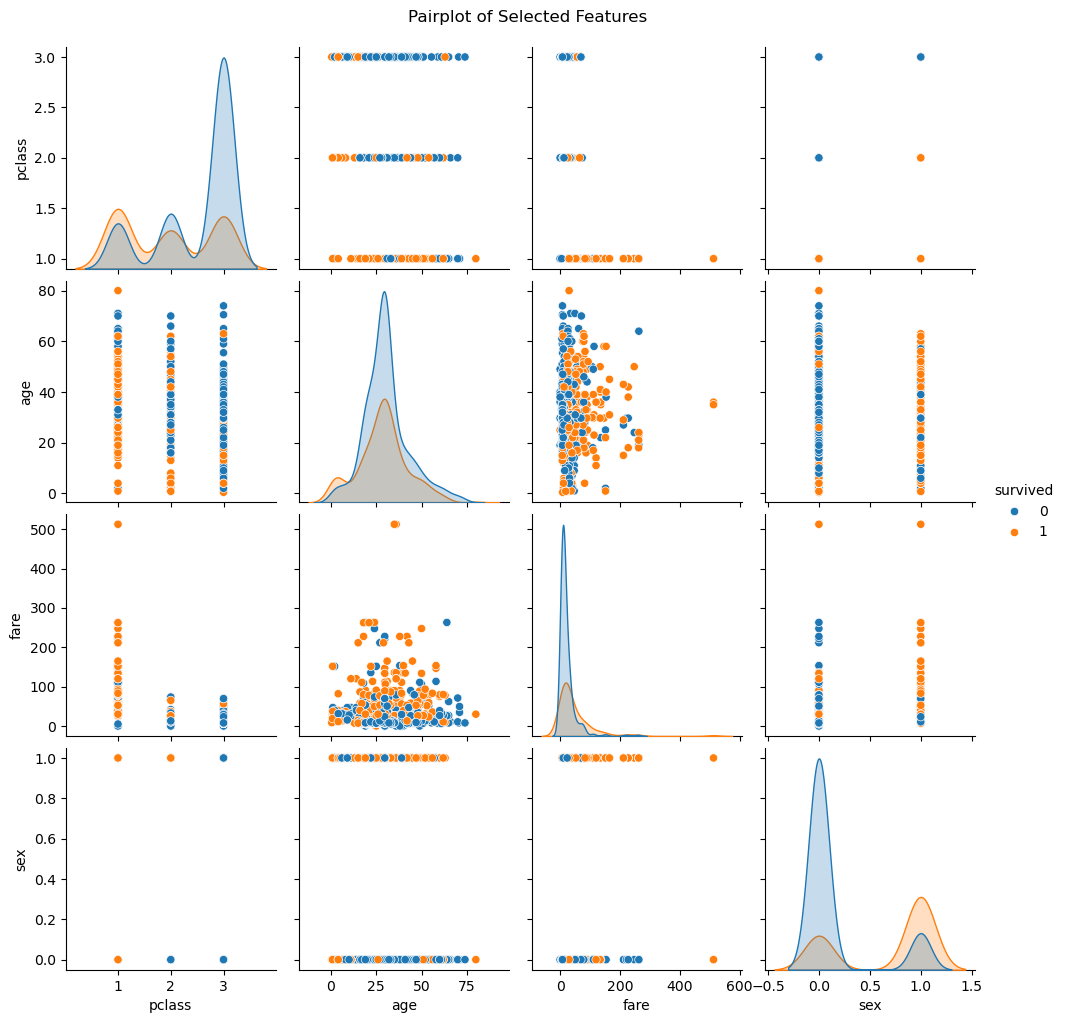

In [35]:

subset = df1[['survived', 'pclass', 'age', 'fare', 'sex']]
subset = subset.dropna()
subset['sex'] = subset['sex'].map({'male': 0, 'female': 1})

sns.pairplot(subset, hue='survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()
